## Week 1. Lab Code  
  
\* doc : https://docs.scipy.org/doc/scipy/reference/stats.html  

In [2]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

**Peeking how to implement pdf function**

In [3]:
print(inspect.getsource(scipy.stats.norm._pdf))
print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



### Part 1. Plotting Likelihood, Prior, and Posterior

In [4]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

def plotting_Likelihood_Prior_Posterior(n, y, a0, b0, title):
    prior = st.beta(a=a0, b=b0)
    post = st.beta(a=a0+n, b=b0+(n-y))
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    # 원래는 likelihood 앞에 막 이렇게 곱하면 안되지만...
    # 그래도 그 존재라도 알기 위해서... 0이 아니에요 ㅠㅡㅜ
    plt.plot(thetas, (10**4)*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.title(title)
    plt.legend();    

**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  

Weak likelihood $\times$ Uninformative prior

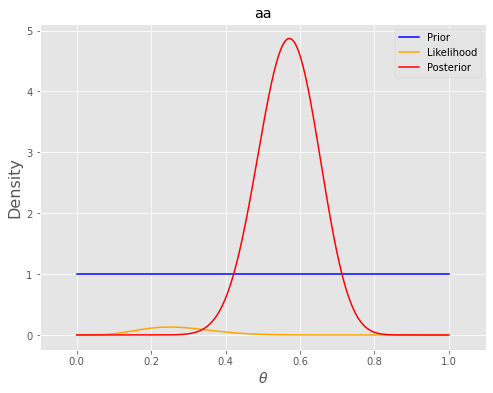

In [20]:
plotting_Likelihood_Prior_Posterior(20, 5, 1, 1, "aa")

Weak likelihood $\times$ Weak prior

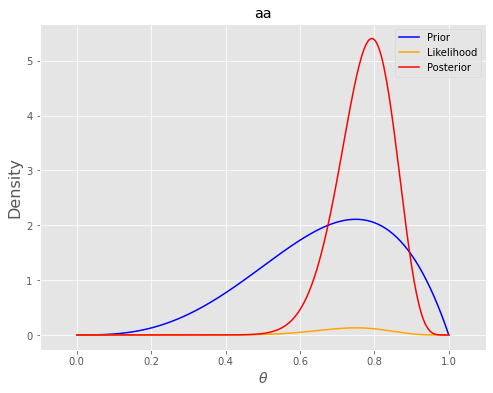

In [21]:
plotting_Likelihood_Prior_Posterior(20, 15, 4, 2, "aa")

Weak likelihood $\times$ Strong prior

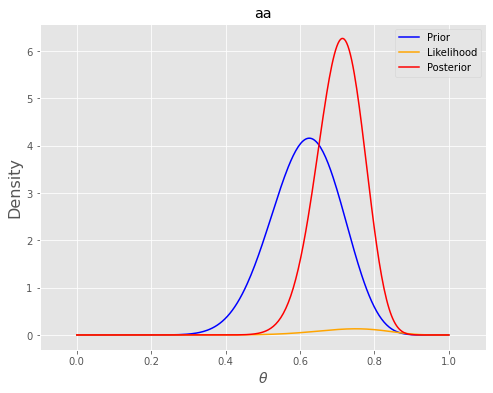

In [30]:
plotting_Likelihood_Prior_Posterior(20, 15, 16, 10, "aa")

Strong likelihood $\times$ Uninformative prior

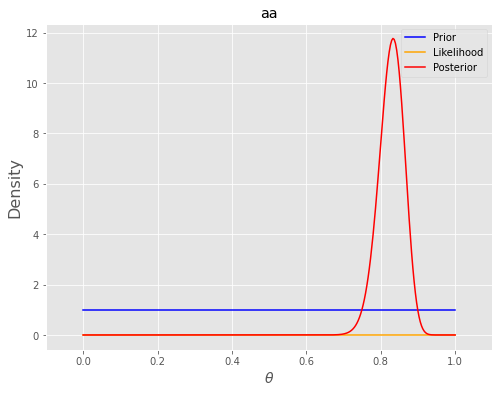

In [31]:
plotting_Likelihood_Prior_Posterior(100, 80, 1, 1, "aa")

Strong likelihood $\times$ Weak prior

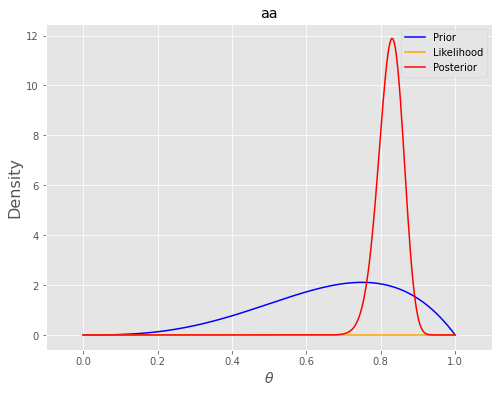

In [32]:
plotting_Likelihood_Prior_Posterior(100, 80, 4, 2, "aa")

Strong likelihood $\times$ Strong prior

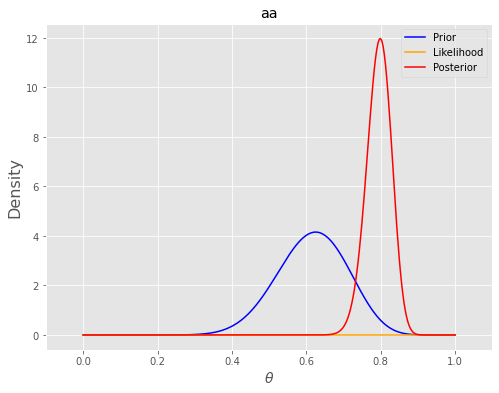

In [33]:
plotting_Likelihood_Prior_Posterior(100, 80, 16, 10, "aa")

**Example 1 ) BDA p.37**

In [53]:
plt.rc('font', size=12)

# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y,n-y) = (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

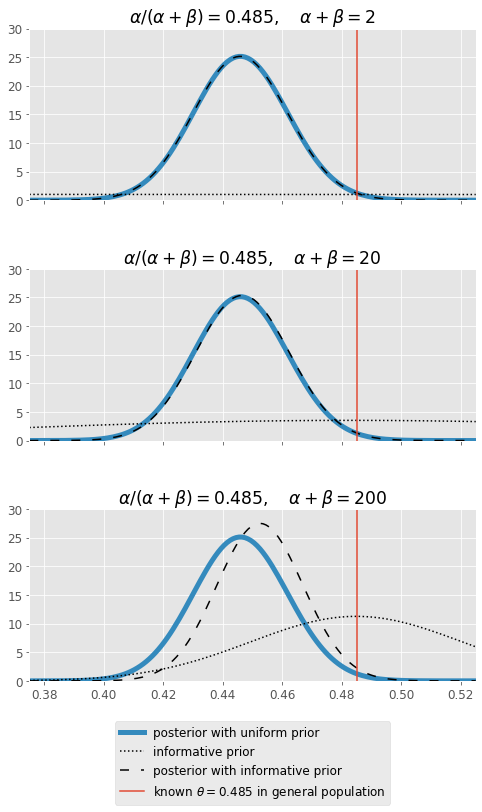

In [57]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);

### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 